# Name: Ajay Mehra

### 1.       Explain what is Fido and why is it used?

`Fido` is a search and download tool in `SunPy` for solar physics data. It's a unified interface for querying multiple data sources (like AIA, HMI, GOES, etc.) to fetch solar observation data.

Purpose: It simplifies obtaining solar observational data by allowing users to query, filter, and download data based on time ranges, instruments, and wavelengths.


### 2. Obtain the flare list with >M1.0 as per Case Study 1 for the first week of May 2023. Store the results as a CSV file.

In [1]:
from sunpy.net import Fido
from sunpy.net import attrs as a

In [2]:
event_type = "FL"
tstart = "2023/05/01"
tend = "2023/05/07"
result = Fido.search(a.Time(tstart, tend),
a.hek.EventType(event_type),
a.hek.FL.GOESCls > "M1.0",
a.hek.OBS.Observatory == "GOES")

In [3]:
hek_results = result["hek"]
print(hek_results.show("event_starttime", "event_peaktime",
"event_endtime", "fl_goescls", "ar_noaanum"))

filtered_results = hek_results["event_starttime", "event_peaktime",
"event_endtime", "fl_goescls", "ar_noaanum"]
#storing results as csv file
filtered_results.write("july_M1_flares.csv", format="csv", overwrite=True)

    event_starttime          event_peaktime          event_endtime      fl_goescls ar_noaanum
----------------------- ----------------------- ----------------------- ---------- ----------
2023-05-01 00:55:00.000 2023-05-01 01:21:00.000 2023-05-01 01:29:00.000       M1.1          0
2023-05-01 13:02:00.000 2023-05-01 13:09:00.000 2023-05-01 13:13:00.000       M7.1          0
2023-05-03 09:15:00.000 2023-05-03 09:27:00.000 2023-05-03 09:33:00.000       M4.2          0
2023-05-03 10:03:00.000 2023-05-03 10:14:00.000 2023-05-03 10:19:00.000       M3.1          0
2023-05-03 10:36:00.000 2023-05-03 10:45:00.000 2023-05-03 10:49:00.000       M7.2          0
2023-05-03 12:24:00.000 2023-05-03 12:35:00.000 2023-05-03 12:41:00.000       M1.7          0
2023-05-03 13:43:00.000 2023-05-03 13:50:00.000 2023-05-03 13:54:00.000       M2.2          0
2023-05-04 08:05:00.000 2023-05-04 08:44:00.000 2023-05-04 09:08:00.000       M3.9          0
2023-05-05 07:30:00.000 2023-05-05 08:01:00.000 2023-05-05 0

### 3.       Try Case Study 2 with a different sample image from AIA or an image obtained from Fido for a specific date of your choice.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import sunpy.map


In [6]:
start_time = "2023-08-01T00:00:00"  
end_time = "2023-08-01T00:01:00"   
wavelength = 193 * u.angstrom       # AIA 193 Å wavelength
# Query data using Fido
query = Fido.search(
    a.Time(start_time, end_time),
    a.Instrument('AIA'),
    a.Wavelength(wavelength)
)
downloaded_files = Fido.fetch(query)
# Loading the downloaded file into a SunPy Map
aia_map = sunpy.map.Map(downloaded_files[0])
# Finding the brightest pixel
pixel_pos = np.argwhere(aia_map.data == aia_map.data.max()) * u.pixel
hpc_max = aia_map.wcs.pixel_to_world(pixel_pos[:, 1], pixel_pos[:, 0])

Files Downloaded:   0%|          | 0/5 [00:00<?, ?file/s]

2025-01-06 09:49:02 - parfive - INFO: http://netdrms01.nispdc.nso.edu/cgi-bin/netdrms/drms_export.cgi?series=aia__lev1;compress=rice;record=193_1469923291-1469923291 failed to download with exception
Timeout on reading data from socket


1/0 files failed to download. Please check `.errors` for details


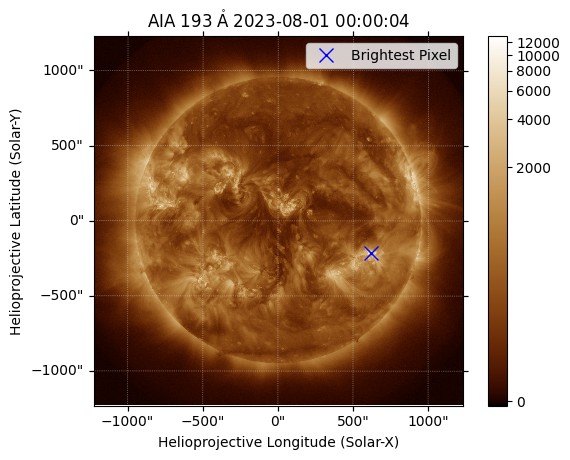

In [7]:
# plotting
fig = plt.figure()
ax = fig.add_subplot(projection=aia_map)
aia_map.plot(axes=ax)
ax.plot_coord(hpc_max, 'bx', fillstyle='none', markersize=10, label="Brightest Pixel")
ax.legend()
plt.colorbar(aia_map.plot())
plt.show()

### 4.       Explain the purpose of sunpy.coordinate.

The `sunpy.coordinates` submodule handles solar-specific coordinate transformations, such as:
- Converting between observer and helioprojective coordinates.
- Representing points in different solar reference frames (e.g., Heliocentric, Helioprojective, or Stonyhurst coordinates).
- Enabling accurate spatial analysis of solar features.


### 5.       What is the significance of finding the brightest pixel in an image?

The brightest pixel in solar images often corresponds to the most intense regions of solar activity (e.g., solar flares or active regions).

Why it matters:
- Identifying regions of maximum emission can help locate solar flares or magnetic reconnection events.
- It's useful for tracking solar dynamics and studying coronal heating mechanisms.

### 6.       What is the relation between the presence of X class of solar flare and the solar activity maxima and minima?

`X-class solar flares` are the most powerful flares emitted by the Sun, releasing enormous energy and impacting space weather. Their occurrence is closely linked to the solar cycle, an approximately 11-year cycle of solar activity marked by alternating periods of high and low activity known as solar maxima and minima.

During `solar maxima`, the Sun exhibits numerous sunspots and complex magnetic fields, which are fertile grounds for the formation of X-class flares. These strong flares are frequent in this phase as the Sun’s magnetic energy is at its peak. In contrast, during `solar minima`, sunspot activity and magnetic complexity significantly decrease, making X-class flares rare.

The relationship between `X-class flares` and the `solar cycle` underscores how the Sun’s magnetic field drives its activity. During `solar maxima`, the Sun's magnetic field becomes highly dynamic, with intricate and unstable configurations forming around sunspots and active regions. These conditions store vast amounts of magnetic energy, which can be explosively released as powerful X-class flares. Conversely, during `solar minima`, the Sun’s magnetic field is relatively stable and less active, resulting in fewer sunspots and minimal magnetic energy buildup, making X-class flares rare. This connection is crucial for predicting periods of increased solar activity, as X-class flares can disrupt satellite operations, communication systems, and power grids on Earth.

Source: https://www.snexplores.org/article/explainer-solar-cycle